<a href="https://colab.research.google.com/github/Guilli12pm/ML_proj/blob/master/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning project: kNN

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import pathlib
import random
from statistics import mode, StatisticsError
import timeit

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

##Download the images

In [16]:
#https://github.com/Guilli12pm/ML_proj/raw/master/next_ite.tar.gz

data_root_orig = tf.keras.utils.get_file('new_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic.tar.gz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/new_pic/.DS_Store
/root/.keras/datasets/new_pic/Guillaume_Paya
/root/.keras/datasets/new_pic/Guillaume_Loranchet


In [17]:
data_root_orig_1 = tf.keras.utils.get_file('new_pic(1)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(1).tar.gz',
                                         untar=True)
data_root_1 = pathlib.Path(data_root_orig_1)
for item in data_root_1.iterdir():
  print(item)

/root/.keras/datasets/new_pic(1)/.DS_Store
/root/.keras/datasets/new_pic(1)/Miha_S


In [18]:
data_root_orig_2 = tf.keras.utils.get_file('new_pic(2)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(2).tar.gz',
                                         untar=True)
data_root_2 = pathlib.Path(data_root_orig_2)
for item in data_root_2.iterdir():
  print(item)

/root/.keras/datasets/new_pic(2)/.DS_Store
/root/.keras/datasets/new_pic(2)/Nicholas_S


In [19]:
data_root_orig_test = tf.keras.utils.get_file('next_ite',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/result.tar.gz',
                                         untar=True)
data_root_test = pathlib.Path(data_root_orig_test)
for item in data_root_test.iterdir():
  print(item)

/root/.keras/datasets/next_ite/.DS_Store
/root/.keras/datasets/next_ite/Guillaume_Paya
/root/.keras/datasets/next_ite/Nicholas_S
/root/.keras/datasets/next_ite/Guillaume_Loranchet
/root/.keras/datasets/next_ite/Miha_S
/root/.keras/datasets/next_ite/Abdel_R


In [20]:
data_root_orig_testing_test = tf.keras.utils.get_file('normal_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/normal_pic.tar.gz',
                                         untar=True)
data_root_testing_test = pathlib.Path(data_root_orig_testing_test)
for item in data_root_testing_test.iterdir():
  print(item)

/root/.keras/datasets/normal_pic/.DS_Store
/root/.keras/datasets/normal_pic/Guillaume_Paya
/root/.keras/datasets/normal_pic/Nicholas_S
/root/.keras/datasets/normal_pic/Guillaume_Loranchet
/root/.keras/datasets/normal_pic/Miha_S


##Inspect the dataset

In [0]:
all_image_paths_0 = list(data_root.glob('*/*'))
all_image_paths_1 = list(data_root_1.glob('*/*'))
all_image_paths_2 = list(data_root_2.glob('*/*'))

all_image_paths_train = all_image_paths_2 + all_image_paths_1 + all_image_paths_0

all_image_paths_train = [str(path) for path in all_image_paths_train]
random.shuffle(all_image_paths_train)

all_image_paths_test = list(data_root_test.glob('*/*'))

all_image_paths_test = [str(path) for path in all_image_paths_test]
random.shuffle(all_image_paths_test)

all_image_paths_testing_test = list(data_root_testing_test.glob('*/*'))

all_image_paths_testing_test = [str(path) for path in all_image_paths_testing_test]
random.shuffle(all_image_paths_testing_test)

image_count_train = len(all_image_paths_train)

In [22]:
all_image_paths_train[:5]

['/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_51_sp_3_rot_anty_4.png',
 '/root/.keras/datasets/new_pic(1)/Miha_S/Miha_S_53_sharpened_2_7_rot_anty_4.png',
 '/root/.keras/datasets/new_pic/Guillaume_Loranchet/Guillaume_Loranchet_51_rot_anty_2.png',
 '/root/.keras/datasets/new_pic/Guillaume_Paya/Guillaume_Paya_88_sp_7_rot_anty_4.png',
 '/root/.keras/datasets/new_pic(1)/Miha_S/Miha_S_22_sharpened_1_0_rot_anty_4.png']

In [23]:
all_image_paths_test[:5]

['/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_144.png',
 '/root/.keras/datasets/next_ite/Miha_S/Miha_S_111.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_121.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_146.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_108.png']

In [24]:
all_image_paths_testing_test[:5]

['/root/.keras/datasets/normal_pic/Guillaume_Loranchet/Guillaume_Loranchet_29.png',
 '/root/.keras/datasets/normal_pic/Nicholas_S/Nicholas_87.png',
 '/root/.keras/datasets/normal_pic/Guillaume_Loranchet/Guillaume_Loranchet_4.png',
 '/root/.keras/datasets/normal_pic/Nicholas_S/Nicholas_94.png',
 '/root/.keras/datasets/normal_pic/Guillaume_Loranchet/Guillaume_Loranchet_17.png']

In [0]:
image_paths_test_abdel = []

In [29]:
for imag in all_image_paths_test:
  if 'Abdel_R' in imag:
    image_paths_test_abdel.append(imag)
    all_image_paths_test.remove(imag)
  if 'Miha_S' in imag:
    all_image_paths_test.remove(imag)

for imag in all_image_paths_train:
  if 'Miha_S' in imag:
    all_image_paths_train.remove(imag)

for imag in all_image_paths_testing_test:
  if 'Miha_S' in imag:
    all_image_paths_testing_test.remove(imag)

print(len(image_paths_test_abdel))
all_image_paths_test[:5]

27


['/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_144.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_121.png',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_146.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_108.png',
 '/root/.keras/datasets/next_ite/Guillaume_Loranchet/Guillaume_Loranchet_111.png']

###Show images

Training images


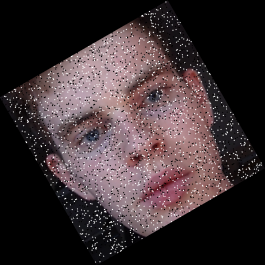

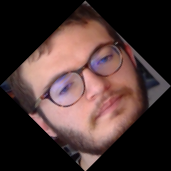


Testing images


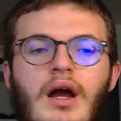

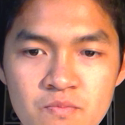

In [30]:
import IPython.display as display

print('Training images')
for n in range(2):
  image_path = random.choice(all_image_paths_train)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

print('\nTesting images')
for n in range(2):
  image_path = random.choice(all_image_paths_test)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

###Label images

In [31]:
label_names_0 = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names_1 = sorted(item.name for item in data_root_1.glob('*/') if item.is_dir())
label_names_2 = sorted(item.name for item in data_root_2.glob('*/') if item.is_dir())

label_names = label_names_0 + label_names_1 + label_names_2
label_names.remove('Miha_S')
label_names

['Guillaume_Loranchet', 'Guillaume_Paya', 'Nicholas_S']

In [32]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'Guillaume_Loranchet': 0, 'Guillaume_Paya': 1, 'Nicholas_S': 2}

In [0]:
for name in label_names:
  stri = '/root/.keras/datasets/next_ite/' + name + '/.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)
  stri = '/root/.keras/datasets/next_ite/' + name + '/._.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)

In [0]:
#for path in all_image_paths_test:
#  print(path)

In [37]:
all_image_labels_train = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_train]

print("First 10 labels indices of training set: ", all_image_labels_train[:10])

all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]

print("First 10 labels indices of training set: ", all_image_labels_test[:10])

all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

print("First 10 labels indices of training set: ", all_image_labels_testing_test[:10])

First 10 labels indices of training set:  [2, 0, 1, 1, 0, 1, 2, 2, 0, 2]
First 10 labels indices of training set:  [0, 1, 1, 2, 0, 2, 0, 0, 2, 0]
First 10 labels indices of training set:  [0, 2, 0, 2, 0, 2, 1, 2, 1, 1]


###Load images with Tensor Flow

In [38]:
img_path = all_image_paths_train[0]
img_path

'/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_51_sp_3_rot_anty_4.png'

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

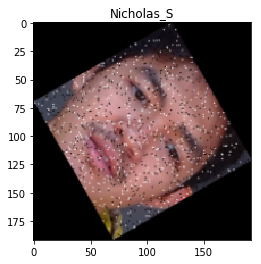

In [40]:
image_path = all_image_paths_train[0]
label = all_image_labels_train[0]

plt.imshow(load_and_preprocess_image(image_path)/255)
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [41]:
n_train = len(all_image_paths_train)

x_train_aux = [load_and_preprocess_image(all_image_paths_train[i]) for i in range(n_train)]
x_train_aux_2 = np.array([np.array(x_train_aux[i]) for i in range(n_train)])
x_train = x_train_aux_2 / 255   #normalize between 0 and 1

n_test = len(all_image_paths_test)

x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
x_test = x_test_aux_2 / 255   #normalize between 0 and 1

n_testing_test = len(all_image_paths_testing_test)

x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1
print(x_train.shape)
print(x_test.shape)
print(x_testing_test.shape)

n_test_abdel = len(image_paths_test_abdel)

x_test_abdel_aux = [load_and_preprocess_image(image_paths_test_abdel[i]) for i in range(n_test_abdel)]
x_test_abdel_aux_2 = np.array([np.array(x_test_abdel_aux[i]) for i in range(n_test_abdel)])
x_test_abdel = x_test_abdel_aux_2 / 255   #normalize between 0 and 1
print(x_test_abdel.shape)

y_train = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_train])
y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])
y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
print(y_train.shape)
print(y_test.shape)
print(y_testing_test.shape)

labels = label_names
print(labels)

print(y_train[0])

(2970, 192, 192, 3)
(160, 192, 192, 3)
(30, 192, 192, 3)
(27, 192, 192, 3)
(2970, 3)
(160, 3)
(30, 3)
['Guillaume_Loranchet', 'Guillaume_Paya', 'Nicholas_S']
[0 0 1]


(2970, 3)


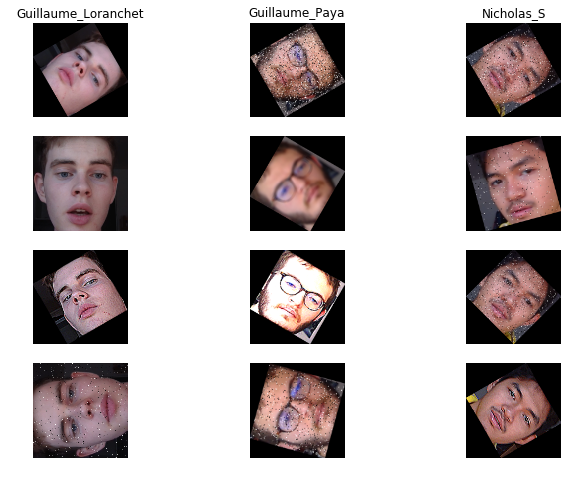

(160, 3)


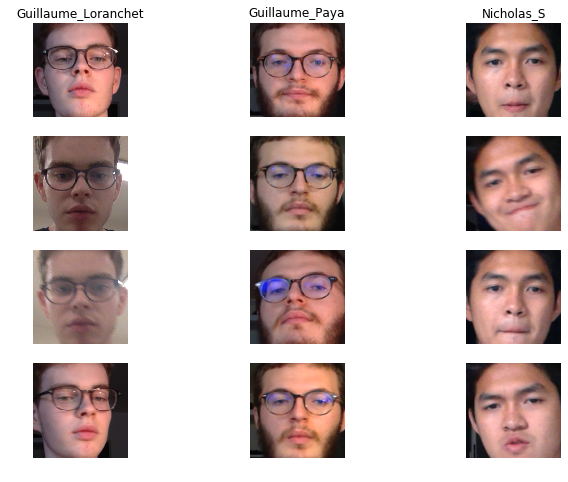

(30, 3)


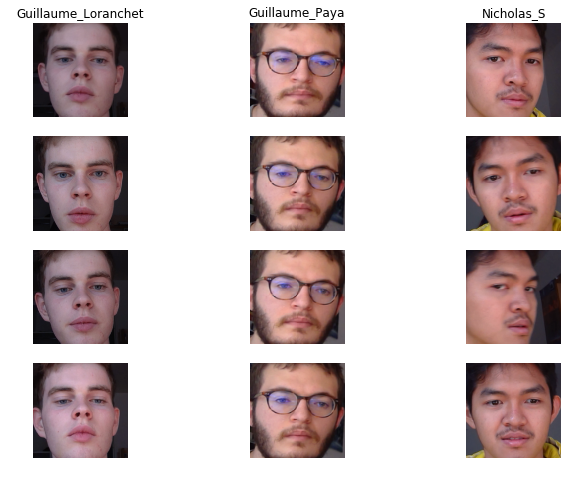

In [42]:
def show_first_n_images_in_categories(n, images, categories, labels, file_name=None):
    """Plots the first n images in each category from the image data."""
    f, axes = plt.subplots(n, len(categories[0]), figsize=(11,8))
    print(categories.shape)
    for i in range(len(categories[0])):
        count = 0
        j = 0
        while count < n and j < len(categories):
            #print(j,i)
            if categories[j][i] == 1:
                axes[count,i].imshow(images[j,:,:,:])
                axes[count,i].axis('off')
                if count == 0:
                    axes[count,i].set_title(labels[i])
                count += 1
            j += 1

    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()

show_first_n_images_in_categories(4, x_train, y_train, labels)
show_first_n_images_in_categories(4, x_test, y_test, labels)
show_first_n_images_in_categories(4, x_testing_test, y_testing_test, labels)

##kNN Model

In [43]:
def euclidean_distance(ima_1,ima_2):
  return np.sqrt(sum(sum(sum((ima_1-ima_2)**2))))

print(euclidean_distance(x_train[0],x_train[1]))

49.966345485259815


In [0]:
def test(ima_test,label):
  print(label)
  x1, x2, x3, x4 = [],[],[],[]
  for i in range(0,100):
    if y_train[i][0]:
      x1.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][1]:
      x2.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][2]:
      x3.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][3]:
      x4.append(euclidean_distance(ima_test,x_train[i]))

  liste = [np.mean(x1),np.mean(x2),np.mean(x3),np.mean(x4)]
  return liste

#test(x_test[32],y_test[32])

In [0]:
def average(liste):
  return sum(liste)/len(liste)

In [0]:
def clustering(x,y,k):
  nb_pers = len(y[0])  #4
  res = [[] for _ in range(nb_pers)]
  intermediate = [[] for _ in range(nb_pers)]
  
  for i in range(len(x)):
    for j in range(nb_pers):
      if len(intermediate[j]) == k:   #make groups of size k
        res[j].append(average(intermediate[j]))  
        intermediate[j] = []
    for j in range(nb_pers):
      if y[i][j]:   # i-th picture represent the j-th person in labels
        intermediate[j].append(x[i])
  for j in range(nb_pers):
    if len(intermediate[j]) != 0:
      res[j].append(average(intermediate[j])) 
  return res
        

A = clustering(x_train,y_train,100)

In [47]:
def try_mode(liste):
  '''check if there are more than 1 mode'''
  try:
    return mode(liste)
  except StatisticsError:
    return -1
  
B = [1,2,3]
try_mode(B)

-1

In [52]:
A = clustering(x_test,y_test,1)

def kNN(ima_input,A,k):  
  res_aux = {}
  for i in range(len(A)):
    for j in range(len(A[i])):
      res_aux[euclidean_distance(ima_input,A[i][j])] = i
        
  res = [value for (key,value) in sorted(res_aux.items())]   #take only the first k closest element
  #print(res)
  while try_mode(res[:k]) == -1:  #return the most frequent element
    k += 1
  return mode(res[:k])
  
  
def test_knn(x_test,y_test,A,k):
  '''output: accuracy'''
  res = 0
  for i in range(len(y_test)):
    val = kNN(x_test[i],A,k)
    if y_test[i][val]:
      res += 1
  return res/len(y_test)  

#print(test_knn(x_testing_test,y_testing_test,A,4))


for k in range(1,30,4):
  print("Taking into account the {} closest neighbourd, the accuracy is {}".format(k,test_knn(x_testing_test,y_testing_test,A,k)))
  print('')


Taking into account the 1 closest neighbourd, the accuracy is 0.8

Taking into account the 5 closest neighbourd, the accuracy is 0.8666666666666667

Taking into account the 9 closest neighbourd, the accuracy is 0.8333333333333334

Taking into account the 13 closest neighbourd, the accuracy is 0.7666666666666667

Taking into account the 17 closest neighbourd, the accuracy is 0.7666666666666667

Taking into account the 21 closest neighbourd, the accuracy is 0.7333333333333333

Taking into account the 25 closest neighbourd, the accuracy is 0.7

Taking into account the 29 closest neighbourd, the accuracy is 0.6



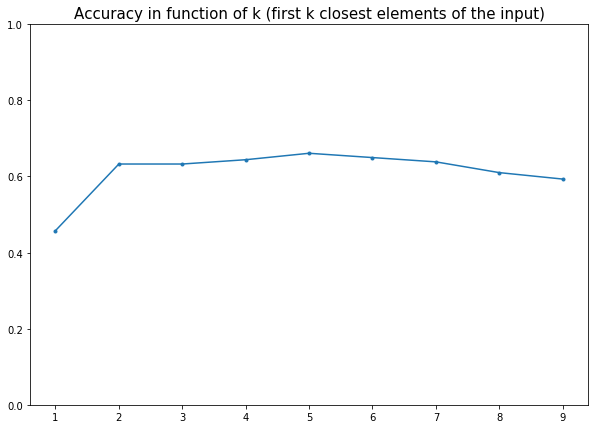

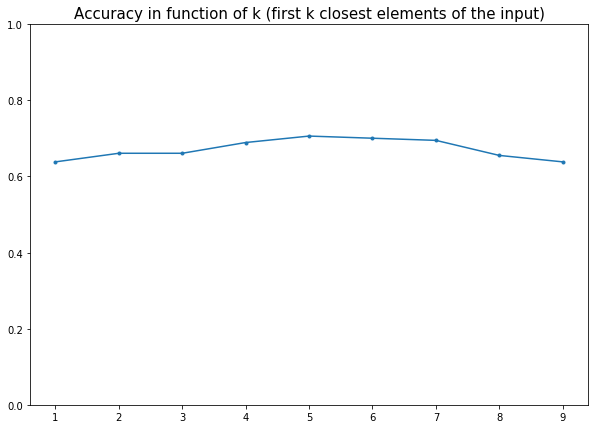

In [53]:
A = [0.4576271186440678, 0.632768361581921,0.632768361581921 ,0.6440677966101694 , 0.6610169491525424, 0.6497175141242938, 0.6384180790960452,0.6101694915254238 , 0.5932203389830508]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()

A = [0.6384180790960452, 0.6610169491525424, 0.6610169491525424, 0.6892655367231638, 0.7062146892655368, 0.7005649717514124, 0.6949152542372882, 0.655367231638418, 0.6384180790960452]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()

In [54]:
n = len(y_testing_test)

def test_plot(liste = [1,2,3,4,5,6,7,8,10,12,15]):
  for i in liste:
    A = clustering(x_test,y_test,i)
    def test_time():
      print('Cluster of {} elements'.format(i))
      print('Accuracy: ',test_knn(x_testing_test,y_testing_test,A,3))

    print('Time to predict each picture',timeit.timeit(test_time,number=1)/n,'\n')
    
test_plot()

def test_plot_v2(x_train,y_train,x_test,y_test,liste,k):
  res = [0 for _ in range(len(liste))]
  j = 0
  for i in liste:
    A = clustering(x_train,y_train,i)
    accuracy = test_knn(x_test,y_test,A,k)
    res[j] = accuracy
    j += 1
  return res

Cluster of 1 elements
Accuracy:  0.8666666666666667
Time to predict each picture 0.10562415723331166 

Cluster of 2 elements
Accuracy:  0.8333333333333334
Time to predict each picture 0.02962538556663882 

Cluster of 3 elements
Accuracy:  0.8
Time to predict each picture 0.019472666766644883 

Cluster of 4 elements
Accuracy:  0.6333333333333333
Time to predict each picture 0.014672719133341162 

Cluster of 5 elements
Accuracy:  0.6
Time to predict each picture 0.011632727800012314 

Cluster of 6 elements
Accuracy:  0.5666666666666667
Time to predict each picture 0.010163004833339073 

Cluster of 7 elements
Accuracy:  0.6
Time to predict each picture 0.008440855900031845 

Cluster of 8 elements
Accuracy:  0.6666666666666666
Time to predict each picture 0.007471038533306758 

Cluster of 10 elements
Accuracy:  0.5666666666666667
Time to predict each picture 0.006009845333331517 

Cluster of 12 elements
Accuracy:  0.6
Time to predict each picture 0.005249345133355139 

Cluster of 15 elemen

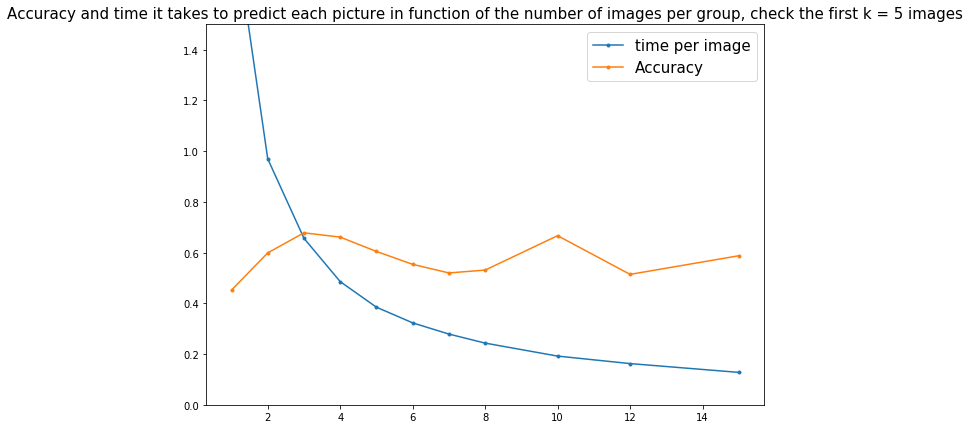

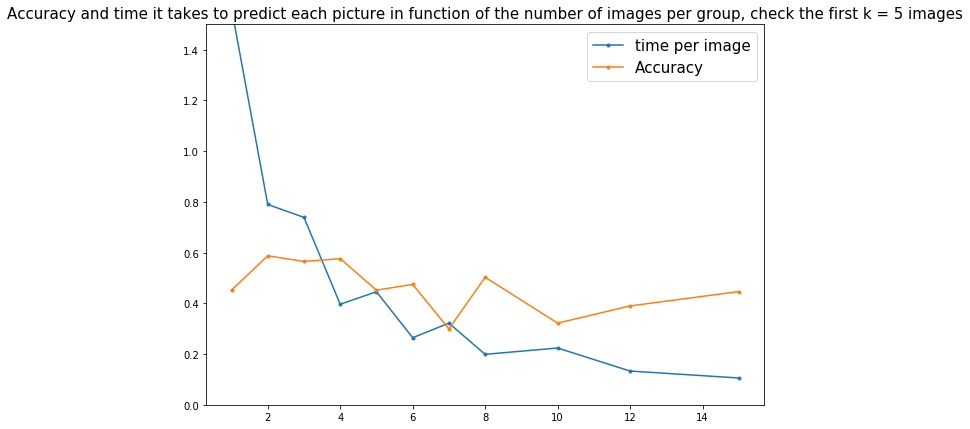

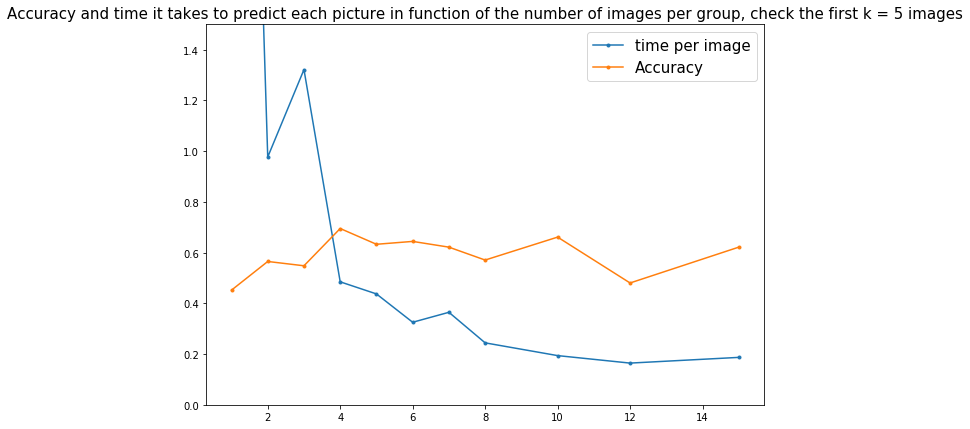

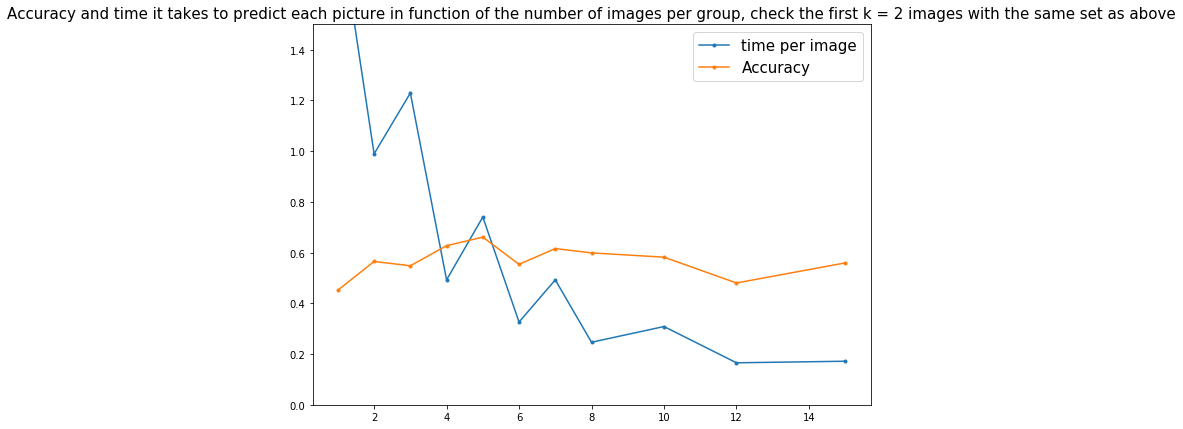

In [55]:
A = [1.9556941677344652,0.9695916148757019,0.6562474537514149,0.48557390805649575,0.3847716027118679,0.32295399453672524,0.27883983207344387,0.24320527823164087, 0.1919944706892675 ,0.16246278505084485  , 0.12778141203954752 ]
B = [0.4519774011299435,0.5988700564971752,0.6779661016949152,0.6610169491525424,0.6045197740112994,0.5536723163841808 ,0.519774011299435,0.5310734463276836 ,0.6666666666666666 ,0.5141242937853108 , 0.5875706214689266]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.5631840424519776,0.7896613351468931 ,0.7388307934406788 , 0.3963731183954804 ,0.4456509903672313 ,0.26446220867796655 ,0.3217400533559327 ,0.1989596205762712 ,0.2238477530395486 ,0.13305251205649724 ,0.10575665348587636 ]
B = [0.4519774011299435,0.5875706214689266,0.5649717514124294,0.576271186440678,0.4519774011299435,0.4745762711864407,0.2994350282485876,0.5028248587570622,0.3220338983050847,0.3898305084745763,0.4463276836158192]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [5.509470149999999,0.9767672461638421 ,1.3214222332033896 ,0.4847251269265539 ,0.43708202742372726 ,0.32536828557627134 ,0.3646449667118636 ,0.2441796150169492 ,0.1939253001242925 ,0.1643949571977422 ,0.18692199483615757 ]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6949152542372882,0.632768361581921,0.6440677966101694,0.6214689265536724,0.5706214689265536,0.6610169491525424,0.480225988700565,0.6214689265536724]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.9345539544124293,0.9893024473559323,1.2290385608757062,0.4926231926723159 ,0.7401058078813552,0.326265965728814,0.49248329315819217,0.24658806461581925,0.30851309332768395,0.16557568342372855,0.17173665325988668]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6271186440677966,0.6610169491525424,0.5536723163841808,0.615819209039548,0.5988700564971752,0.5819209039548022,0.480225988700565,0.559322033898305]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 2 images with the same set as above',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

In [56]:
def test_average_accuracy(k):
  random.shuffle(all_image_paths_testing_test)

  random.shuffle(all_image_paths_test)
  
  all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

  all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]
  
  n_testing_test = len(all_image_paths_testing_test)

  x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
  x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
  x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1

  n_test = len(all_image_paths_test)

  x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
  x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
  x_test = x_test_aux_2 / 255   #normalize between 0 and 1

  y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
  y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])

  accuracy = test_plot_v2(x_test,y_test,x_testing_test,y_testing_test,[1,2],k)
  
  print(accuracy)
  
  return accuracy

n = 10
k = 3
accu= [] 

for _ in range(n):
  accu.append(test_average_accuracy(k))
  
print(accu)

[0.8666666666666667, 0.8]
[0.8666666666666667, 0.8]
[0.8666666666666667, 0.7666666666666667]
[0.8666666666666667, 0.8666666666666667]
[0.8666666666666667, 0.8333333333333334]
[0.8666666666666667, 0.8]
[0.8666666666666667, 0.8666666666666667]
[0.8666666666666667, 0.7]
[0.8666666666666667, 0.8333333333333334]
[0.8666666666666667, 0.8333333333333334]
[[0.8666666666666667, 0.8], [0.8666666666666667, 0.8], [0.8666666666666667, 0.7666666666666667], [0.8666666666666667, 0.8666666666666667], [0.8666666666666667, 0.8333333333333334], [0.8666666666666667, 0.8], [0.8666666666666667, 0.8666666666666667], [0.8666666666666667, 0.7], [0.8666666666666667, 0.8333333333333334], [0.8666666666666667, 0.8333333333333334]]


In [57]:
print("Average accuracy for clusters of size 1: ", 0.866)
print("Average accuracy for clusters of size 2: ", (0.8*3+0.76+0.86*2+0.83*3+0.7)/10)


Average accuracy for clusters of size 1:  0.866
Average accuracy for clusters of size 2:  0.8069999999999998


In [60]:
print(x_test_abdel.shape)

A = clustering(x_train,y_train,1)
B = clustering(x_test,y_test,1)


def test_abdel(x_test_abdel,A,k=3):
  '''output: accuracy'''
  res = []
  for i in range(len(x_test_abdel)):
    val = kNN(x_test_abdel[i],A,k)
    res.append(val)
  return res

res = test_abdel(x_test_abdel,A,)
print(res)

for i in range(len(labels)):
  print('{} appears {} times'.format(labels[i],res.count(i)))
  
res = test_abdel(x_test_abdel,B)
print(res)

for i in range(len(labels)):
  print('{} appears {} times'.format(labels[i],res.count(i)))

(27, 192, 192, 3)
[0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0]
Guillaume_Loranchet appears 14 times
Guillaume_Paya appears 0 times
Nicholas_S appears 13 times
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Guillaume_Loranchet appears 27 times
Guillaume_Paya appears 0 times
Nicholas_S appears 0 times
